## Live Project 

### Objective 
Sales director of the company is tasked with developing key sales statistical and analytical insights to grow the company to make informed business decisions. These analyses serves as evaluating agent performance, revenue, expenses and probability. These insights will help them to steer the agency towards sustained growth and success in dynamic entertainment landscape.


Pyodbc - Python library that allows Python code to connect to databases using ODBC (Open Database Connectivity) drivers

In [30]:
!pip install pyodbc sqlalchemy pandas

## Establishing SQL connection to Machine Learning

In [2]:
import pandas as pd
from sqlalchemy import create_engine # Takes in the connection URL and returns SQLALchemy Engine
import urllib #Handling URLs, parsing them and sending HTTP request

# DB credentials
server = 'qaececrm-s1.database.windows.net'  
database = 'QAECECRM_June2025'
username = 'dbadmin'
password = 'DashTech1234'
driver = 'ODBC Driver 17 for SQL Server'

# Create connection string
params = urllib.parse.quote_plus(
    f"DRIVER={driver};SERVER={server};DATABASE={database};UID={username};PWD={password}"
)

engine = create_engine(f"mssql+pyodbc:///?odbc_connect={params}")

### Collecting and Generating the Tables From the Database

In [3]:
from sqlalchemy import text #to run raw SQL queries

def get_all_table(engine):
    with engine.connect() as conn:
        result = conn.execute(text("""SELECT t.name as table_name
                                  FROM sys.tables t
                                  ORDER BY t.name"""))
        table_list = [row[0] for row in result]
        table_df = pd.DataFrame(table_list, columns=['Name of the tables'])
    return table_df    


table_df = get_all_table(engine)
#table_list = table_df['Name of the tables'].tolist()
#print(table_list)
#Count of the tables
print(f"Total number of tables presented: {len(table_df)}")

table_df

Total number of tables presented: 189


,Name of the tables
0,AgentCommission
1,AgentCommissionProgram
2,AgentCommissionTypeData
3,AgentPayrollLog
4,Alert
...,...
184,VenueDescription
185,VenueGenreType
186,VenueRequirement
187,VenueRequirementNotification


# Preliminary Analysis

**Data Reading**

In [4]:
def load_table(engine, table_name):
    with engine.connect() as conn:
        query = text(f"SELECT * FROM {table_name}")
        df = pd.read_sql(query, conn) #Read SQL database 
    return df

In [5]:
table_name = "Offer" #Mention the table name that we want to mention
df = load_table(engine, table_name)

In [6]:
df.head()

,OfferId,BlueCardId,OfferStatusId,IsInProgress,LineOfBusinessId,EventTicketTypeId,IsPrivateOffer,IsTicketedEvent,IsBuySell,PresenterName,...,ProductionContactName,ProductionContactPhone,ProductionContactEmail,ProductionContactWebsite,UrlKey,PresenterSignatureId,CreatedDate,CreatedById,UpdatedDate,UpdatedById
0,34161,800003,2,False,1.0,NaN,True,False,False,EastCoast Entertainment,...,None,None,None,None,None,NaN,2018-06-02 04:07:29.963,0,NaT,NaN
1,34164,800004,2,False,1.0,NaN,True,False,False,EastCoast Entertainment,...,None,None,None,None,None,NaN,2018-06-02 04:07:29.963,0,NaT,NaN
2,34165,800005,2,False,1.0,NaN,True,False,False,EastCoast Entertainment,...,None,None,None,None,None,NaN,2018-06-02 04:07:29.963,0,NaT,NaN
3,34166,800006,2,False,1.0,NaN,True,False,False,EastCoast Entertainment,...,None,None,None,None,None,NaN,2018-06-02 04:07:29.963,0,NaT,NaN
4,34171,800007,2,False,1.0,NaN,True,False,False,EastCoast Entertainment,...,None,None,None,None,None,NaN,2018-06-02 04:07:29.963,0,NaT,NaN


In [7]:
df.describe()

,OfferId,BlueCardId,OfferStatusId,LineOfBusinessId,EventTicketTypeId,MailingStateId,MailingCountryId,VenueCapacity,VenueSettingId,VenuePhysicalStateId,VenuePhysicalCountryId,PresenterSignatureId,CreatedById,UpdatedById
count,38.000000,38.000000,38.000000,20.000000,8.0,32.000000,32.000000,27.000000,31.000000,38.000000,38.0,3.000000,3.800000e+01,11.000000
mean,34189.105263,813368.131579,1.815789,1.400000,2.0,29.031250,9.312500,968.370370,1.096774,31.236842,1.0,1076.333333,1.054665e+05,272904.181818
std,13.373612,22825.311245,1.035981,0.502625,0.0,13.022275,15.855064,533.809253,0.396219,13.267384,0.0,108.831674,3.110905e+05,466985.105511
min,34161.000000,800003.000000,1.000000,1.000000,2.0,2.000000,1.000000,0.000000,1.000000,2.000000,1.0,1013.000000,0.000000e+00,104.000000
25%,34181.250000,800390.000000,1.000000,1.000000,2.0,23.000000,1.000000,500.000000,1.000000,26.000000,1.0,1013.500000,1.040000e+02,277.000000
50%,34190.500000,801548.000000,1.000000,1.000000,2.0,28.000000,1.000000,1000.000000,1.000000,28.000000,1.0,1014.000000,2.770000e+02,277.000000
75%,34199.750000,806620.000000,2.000000,2.000000,2.0,41.750000,4.250000,1500.000000,1.000000,46.000000,1.0,1108.000000,2.770000e+02,500138.000000
max,34209.000000,862845.000000,4.000000,2.000000,2.0,46.000000,46.000000,1650.000000,3.000000,46.000000,1.0,1202.000000,1.000445e+06,999999.000000


In [8]:
df.tail()

,OfferId,BlueCardId,OfferStatusId,IsInProgress,LineOfBusinessId,EventTicketTypeId,IsPrivateOffer,IsTicketedEvent,IsBuySell,PresenterName,...,ProductionContactName,ProductionContactPhone,ProductionContactEmail,ProductionContactWebsite,UrlKey,PresenterSignatureId,CreatedDate,CreatedById,UpdatedDate,UpdatedById
33,34205,857265,1,True,NaN,NaN,None,None,None,Kris Kaminski - Test Offer,...,,,,,,NaN,2023-01-02 09:17:45.717,277,NaT,NaN
34,34206,858414,1,True,NaN,NaN,None,None,None,FRESHFIELDS VILLAGE,...,,,,,,NaN,2023-02-17 15:46:21.847,1000414,NaT,NaN
35,34207,861115,1,True,NaN,NaN,None,None,None,AR STATE UNIVERSITY MOUNTAIN HOME,...,,,,,,NaN,2023-04-13 13:14:31.147,1000430,NaT,NaN
36,34208,861115,1,True,NaN,NaN,None,None,None,AR STATE UNIVERSITY MOUNTAIN HOME,...,,,,,,NaN,2023-04-13 13:14:36.967,1000430,NaT,NaN
37,34209,862845,1,True,NaN,NaN,None,None,None,Short Pump Town Center,...,,,,,,NaN,2023-06-27 11:00:44.337,1000445,NaT,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 53 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   OfferId                   38 non-null     int64         
 1   BlueCardId                38 non-null     int64         
 2   OfferStatusId             38 non-null     int64         
 3   IsInProgress              38 non-null     bool          
 4   LineOfBusinessId          20 non-null     float64       
 5   EventTicketTypeId         8 non-null      float64       
 6   IsPrivateOffer            20 non-null     object        
 7   IsTicketedEvent           20 non-null     object        
 8   IsBuySell                 20 non-null     object        
 9   PresenterName             38 non-null     object        
 10  MailingAddress1           38 non-null     object        
 11  MailingAddress2           29 non-null     object        
 12  MailingCity             

In [10]:
df.shape

(38, 53)

# Part -2 

## DATA CLEANING

In [11]:
#Checking null values
df.isnull().sum()

OfferId                      0
BlueCardId                   0
OfferStatusId                0
IsInProgress                 0
LineOfBusinessId            18
EventTicketTypeId           30
IsPrivateOffer              18
IsTicketedEvent             18
IsBuySell                   18
PresenterName                0
MailingAddress1              0
MailingAddress2              9
MailingCity                  0
MailingStateId               6
MailingZip                   0
MailingCountryId             6
BuyerName                    0
BuyerTitle                   0
BuyerEmail                   6
BuyerPhone                   0
BuyerFax                     9
SignerName                   0
SignerTitle                  9
SignerEmail                  6
SignerPhone                  0
SignerFax                    9
VenueName                    0
VenueCapacity               11
VenueSettingId               7
IsSettingCovered             0
TicketOutlet                 0
VenuePhysicalAddress1        0
VenuePhy

In [12]:
#Printing null values along with their datatypes
null_info = df.isnull().sum()
null_columns = null_info[null_info > 0]

null_val = pd.DataFrame({
    'Data Type': df[null_columns.index].dtypes,
    'Null Count': null_columns
})

null_val

,Data Type,Null Count
LineOfBusinessId,float64,18
EventTicketTypeId,float64,30
IsPrivateOffer,object,18
IsTicketedEvent,object,18
IsBuySell,object,18
MailingAddress2,object,9
MailingStateId,float64,6
MailingCountryId,float64,6
BuyerEmail,object,6
BuyerFax,object,9


In [13]:
#Filling null values for numerical and categorical columns
for col in df.columns:
    if df[col].isnull().sum() > 0:
        if df[col].dtype == 'float64' or df[col].dtype == 'int64':
            df[col].fillna(df[col].median(), inplace=True) # median
        elif df[col].dtype == 'object':
            df[col].fillna(df[col].mode()[0], inplace=True) # Mode

In [14]:
#For datetime
df['UpdatedDate'].fillna(pd.to_datetime('today'), inplace=True) #fill with current date

In [15]:
df.isnull().sum()

OfferId                     0
BlueCardId                  0
OfferStatusId               0
IsInProgress                0
LineOfBusinessId            0
EventTicketTypeId           0
IsPrivateOffer              0
IsTicketedEvent             0
IsBuySell                   0
PresenterName               0
MailingAddress1             0
MailingAddress2             0
MailingCity                 0
MailingStateId              0
MailingZip                  0
MailingCountryId            0
BuyerName                   0
BuyerTitle                  0
BuyerEmail                  0
BuyerPhone                  0
BuyerFax                    0
SignerName                  0
SignerTitle                 0
SignerEmail                 0
SignerPhone                 0
SignerFax                   0
VenueName                   0
VenueCapacity               0
VenueSettingId              0
IsSettingCovered            0
TicketOutlet                0
VenuePhysicalAddress1       0
VenuePhysicalAddress2       0
VenuePhysi

In [16]:
pd.set_option('display.max_columns', None)
df.head()

,OfferId,BlueCardId,OfferStatusId,IsInProgress,LineOfBusinessId,EventTicketTypeId,IsPrivateOffer,IsTicketedEvent,IsBuySell,PresenterName,MailingAddress1,MailingAddress2,MailingCity,MailingStateId,MailingZip,MailingCountryId,BuyerName,BuyerTitle,BuyerEmail,BuyerPhone,BuyerFax,SignerName,SignerTitle,SignerEmail,SignerPhone,SignerFax,VenueName,VenueCapacity,VenueSettingId,IsSettingCovered,TicketOutlet,VenuePhysicalAddress1,VenuePhysicalAddress2,VenuePhysicalCity,VenuePhysicalStateId,VenuePhysicalZip,VenuePhysicalCountryId,VenueContactName,VenueContactTitle,VenueContactEmail,VenueContactPhone,VenueContactFax,ProductionCompany,ProductionContactName,ProductionContactPhone,ProductionContactEmail,ProductionContactWebsite,UrlKey,PresenterSignatureId,CreatedDate,CreatedById,UpdatedDate,UpdatedById
0,34161,800003,2,False,1.0,2.0,True,False,False,EastCoast Entertainment,4501 Circle 75 Pkwy,,Atlanta,2.0,99999,2.0,Hunter Lawley,Producer,,205-368-1196,,Hunter Lawley,,,205-368-1196,,Phi Kappa Psi Fraternity,800.0,1.0,True,[Unknown],965 University Blvd,,Tuscaloosa,2,35401,1,[Unknown],,,[Unknown],,,,,,,,1014.0,2018-06-02 04:07:29.963,0,2025-06-20 21:13:02.442042,277.0
1,34164,800004,2,False,1.0,2.0,True,False,False,EastCoast Entertainment,4501 Circle 75 Pkwy,,Atlanta,26.0,30339,26.0,Hunter Lawley,Producer,,205-368 1196,,Hunter Lawley,,,205-368 1196,,Kappa Alpha Fraternity,600.0,1.0,True,[Unknown],Fraternity Row,,Starkville,26,99999,1,[Unknown],,,[Unknown],,,,,,,,1014.0,2018-06-02 04:07:29.963,0,2025-06-20 21:13:02.442042,277.0
2,34165,800005,2,False,1.0,2.0,True,False,False,EastCoast Entertainment,4501 Circle 75 Pkwy,,Atlanta,44.0,30339,44.0,Hunter Lawley,Producer,,770-541 3027,,Hunter Lawley,,,770-541 3027,,Phi Gamma Delta Fraternity,600.0,1.0,True,[Unknown],300 W. 37th Street,,Austin,44,99999,1,[Unknown],,,[Unknown],,,,,,,,1014.0,2018-06-02 04:07:29.963,0,2025-06-20 21:13:02.442042,277.0
3,34166,800006,2,False,1.0,2.0,True,False,False,EastCoast Entertainment,915 Main St. Ste D,,Montevallo,26.0,35115,26.0,Hunter Lawley,Producer,greg@datatouring.com,205-368-1196,,Hunter Lawley,,greg@datatouring.com,205-368-1196,,Sigma Nu Fraternity,800.0,1.0,True,[Unknown],410 Poole Drive,,Oxford,26,38655,1,[Unknown],,,[Unknown],,,,,,,,1014.0,2018-06-02 04:07:29.963,0,2025-06-20 21:13:02.442042,277.0
4,34171,800007,2,False,1.0,2.0,True,False,False,EastCoast Entertainment,2400 Lake Park Dr SE,,Smyrna,11.0,30080,11.0,Mark Letalien,Producer,EntArtNash@aol.com,678-713-8300,,Mark Letalien,,EntArtNash@aol.com,678-713-8300,,Tau Epsilon Phi,500.0,1.0,True,[Unknown],125 Greek Park Circle,,Athens,11,30605,1,[Unknown],,,[Unknown],,,,,,,,1014.0,2018-06-02 04:07:29.963,0,2025-06-20 21:13:02.442042,277.0


In [17]:
#Dropping columns which are having empty data
df = df.drop(columns=['ProductionContactName', 
                      'ProductionContactPhone', 
                      'ProductionContactEmail', 
                      'ProductionContactWebsite',
                      'MailingAddress2',
                      'BuyerFax',
                      'SignerTitle',
                      'SignerFax',
                      'VenuePhysicalAddress2',
                      'VenueContactTitle',	
                      'VenueContactEmail',
                      'VenueContactFax',
                      'ProductionCompany',
                      'UrlKey'])

In [18]:
pd.set_option('display.max_columns', None)
df.head()

,OfferId,BlueCardId,OfferStatusId,IsInProgress,LineOfBusinessId,EventTicketTypeId,IsPrivateOffer,IsTicketedEvent,IsBuySell,PresenterName,MailingAddress1,MailingCity,MailingStateId,MailingZip,MailingCountryId,BuyerName,BuyerTitle,BuyerEmail,BuyerPhone,SignerName,SignerEmail,SignerPhone,VenueName,VenueCapacity,VenueSettingId,IsSettingCovered,TicketOutlet,VenuePhysicalAddress1,VenuePhysicalCity,VenuePhysicalStateId,VenuePhysicalZip,VenuePhysicalCountryId,VenueContactName,VenueContactPhone,PresenterSignatureId,CreatedDate,CreatedById,UpdatedDate,UpdatedById
0,34161,800003,2,False,1.0,2.0,True,False,False,EastCoast Entertainment,4501 Circle 75 Pkwy,Atlanta,2.0,99999,2.0,Hunter Lawley,Producer,,205-368-1196,Hunter Lawley,,205-368-1196,Phi Kappa Psi Fraternity,800.0,1.0,True,[Unknown],965 University Blvd,Tuscaloosa,2,35401,1,[Unknown],[Unknown],1014.0,2018-06-02 04:07:29.963,0,2025-06-20 21:13:02.442042,277.0
1,34164,800004,2,False,1.0,2.0,True,False,False,EastCoast Entertainment,4501 Circle 75 Pkwy,Atlanta,26.0,30339,26.0,Hunter Lawley,Producer,,205-368 1196,Hunter Lawley,,205-368 1196,Kappa Alpha Fraternity,600.0,1.0,True,[Unknown],Fraternity Row,Starkville,26,99999,1,[Unknown],[Unknown],1014.0,2018-06-02 04:07:29.963,0,2025-06-20 21:13:02.442042,277.0
2,34165,800005,2,False,1.0,2.0,True,False,False,EastCoast Entertainment,4501 Circle 75 Pkwy,Atlanta,44.0,30339,44.0,Hunter Lawley,Producer,,770-541 3027,Hunter Lawley,,770-541 3027,Phi Gamma Delta Fraternity,600.0,1.0,True,[Unknown],300 W. 37th Street,Austin,44,99999,1,[Unknown],[Unknown],1014.0,2018-06-02 04:07:29.963,0,2025-06-20 21:13:02.442042,277.0
3,34166,800006,2,False,1.0,2.0,True,False,False,EastCoast Entertainment,915 Main St. Ste D,Montevallo,26.0,35115,26.0,Hunter Lawley,Producer,greg@datatouring.com,205-368-1196,Hunter Lawley,greg@datatouring.com,205-368-1196,Sigma Nu Fraternity,800.0,1.0,True,[Unknown],410 Poole Drive,Oxford,26,38655,1,[Unknown],[Unknown],1014.0,2018-06-02 04:07:29.963,0,2025-06-20 21:13:02.442042,277.0
4,34171,800007,2,False,1.0,2.0,True,False,False,EastCoast Entertainment,2400 Lake Park Dr SE,Smyrna,11.0,30080,11.0,Mark Letalien,Producer,EntArtNash@aol.com,678-713-8300,Mark Letalien,EntArtNash@aol.com,678-713-8300,Tau Epsilon Phi,500.0,1.0,True,[Unknown],125 Greek Park Circle,Athens,11,30605,1,[Unknown],[Unknown],1014.0,2018-06-02 04:07:29.963,0,2025-06-20 21:13:02.442042,277.0


Dealing columns with unknown and some blank data in some rows

In [19]:
import numpy as np
df.replace('[Unknown]', np.nan, inplace=True)

In [20]:
df['Has_TicketOutlet'] = df['TicketOutlet'].replace('[Unknown]', np.nan).notna().astype(int)
df['Has_VenueContactName'] = df['VenueContactName'].replace('[Unknown]', np.nan).notna().astype(int)
df['Has_VenueContactPhone'] = df['VenueContactPhone'].replace('[Unknown]', np.nan).notna().astype(int)

In [21]:
df['HasBuyerEmail'] = df['BuyerEmail'].notna().astype(int)
df['HasSignerEmail'] = df['SignerEmail'].notna().astype(int)

In [22]:
df.head()

,OfferId,BlueCardId,OfferStatusId,IsInProgress,LineOfBusinessId,EventTicketTypeId,IsPrivateOffer,IsTicketedEvent,IsBuySell,PresenterName,MailingAddress1,MailingCity,MailingStateId,MailingZip,MailingCountryId,BuyerName,BuyerTitle,BuyerEmail,BuyerPhone,SignerName,SignerEmail,SignerPhone,VenueName,VenueCapacity,VenueSettingId,IsSettingCovered,TicketOutlet,VenuePhysicalAddress1,VenuePhysicalCity,VenuePhysicalStateId,VenuePhysicalZip,VenuePhysicalCountryId,VenueContactName,VenueContactPhone,PresenterSignatureId,CreatedDate,CreatedById,UpdatedDate,UpdatedById,Has_TicketOutlet,Has_VenueContactName,Has_VenueContactPhone,HasBuyerEmail,HasSignerEmail
0,34161,800003,2,False,1.0,2.0,True,False,False,EastCoast Entertainment,4501 Circle 75 Pkwy,Atlanta,2.0,99999,2.0,Hunter Lawley,Producer,,205-368-1196,Hunter Lawley,,205-368-1196,Phi Kappa Psi Fraternity,800.0,1.0,True,NaN,965 University Blvd,Tuscaloosa,2,35401,1,NaN,NaN,1014.0,2018-06-02 04:07:29.963,0,2025-06-20 21:13:02.442042,277.0,0,0,0,1,1
1,34164,800004,2,False,1.0,2.0,True,False,False,EastCoast Entertainment,4501 Circle 75 Pkwy,Atlanta,26.0,30339,26.0,Hunter Lawley,Producer,,205-368 1196,Hunter Lawley,,205-368 1196,Kappa Alpha Fraternity,600.0,1.0,True,NaN,Fraternity Row,Starkville,26,99999,1,NaN,NaN,1014.0,2018-06-02 04:07:29.963,0,2025-06-20 21:13:02.442042,277.0,0,0,0,1,1
2,34165,800005,2,False,1.0,2.0,True,False,False,EastCoast Entertainment,4501 Circle 75 Pkwy,Atlanta,44.0,30339,44.0,Hunter Lawley,Producer,,770-541 3027,Hunter Lawley,,770-541 3027,Phi Gamma Delta Fraternity,600.0,1.0,True,NaN,300 W. 37th Street,Austin,44,99999,1,NaN,NaN,1014.0,2018-06-02 04:07:29.963,0,2025-06-20 21:13:02.442042,277.0,0,0,0,1,1
3,34166,800006,2,False,1.0,2.0,True,False,False,EastCoast Entertainment,915 Main St. Ste D,Montevallo,26.0,35115,26.0,Hunter Lawley,Producer,greg@datatouring.com,205-368-1196,Hunter Lawley,greg@datatouring.com,205-368-1196,Sigma Nu Fraternity,800.0,1.0,True,NaN,410 Poole Drive,Oxford,26,38655,1,NaN,NaN,1014.0,2018-06-02 04:07:29.963,0,2025-06-20 21:13:02.442042,277.0,0,0,0,1,1
4,34171,800007,2,False,1.0,2.0,True,False,False,EastCoast Entertainment,2400 Lake Park Dr SE,Smyrna,11.0,30080,11.0,Mark Letalien,Producer,EntArtNash@aol.com,678-713-8300,Mark Letalien,EntArtNash@aol.com,678-713-8300,Tau Epsilon Phi,500.0,1.0,True,NaN,125 Greek Park Circle,Athens,11,30605,1,NaN,NaN,1014.0,2018-06-02 04:07:29.963,0,2025-06-20 21:13:02.442042,277.0,0,0,0,1,1


In [23]:
#Dropping columns after creating flags 
df = df.drop(columns=['BuyerEmail','SignerEmail','TicketOutlet','VenueContactName','VenueContactPhone'])

After performing data cleaning 
* Dealing with null values
* Dealing with Unknowns
* Dealing with some missing data in some columns

In [24]:
df.head()

,OfferId,BlueCardId,OfferStatusId,IsInProgress,LineOfBusinessId,EventTicketTypeId,IsPrivateOffer,IsTicketedEvent,IsBuySell,PresenterName,MailingAddress1,MailingCity,MailingStateId,MailingZip,MailingCountryId,BuyerName,BuyerTitle,BuyerPhone,SignerName,SignerPhone,VenueName,VenueCapacity,VenueSettingId,IsSettingCovered,VenuePhysicalAddress1,VenuePhysicalCity,VenuePhysicalStateId,VenuePhysicalZip,VenuePhysicalCountryId,PresenterSignatureId,CreatedDate,CreatedById,UpdatedDate,UpdatedById,Has_TicketOutlet,Has_VenueContactName,Has_VenueContactPhone,HasBuyerEmail,HasSignerEmail
0,34161,800003,2,False,1.0,2.0,True,False,False,EastCoast Entertainment,4501 Circle 75 Pkwy,Atlanta,2.0,99999,2.0,Hunter Lawley,Producer,205-368-1196,Hunter Lawley,205-368-1196,Phi Kappa Psi Fraternity,800.0,1.0,True,965 University Blvd,Tuscaloosa,2,35401,1,1014.0,2018-06-02 04:07:29.963,0,2025-06-20 21:13:02.442042,277.0,0,0,0,1,1
1,34164,800004,2,False,1.0,2.0,True,False,False,EastCoast Entertainment,4501 Circle 75 Pkwy,Atlanta,26.0,30339,26.0,Hunter Lawley,Producer,205-368 1196,Hunter Lawley,205-368 1196,Kappa Alpha Fraternity,600.0,1.0,True,Fraternity Row,Starkville,26,99999,1,1014.0,2018-06-02 04:07:29.963,0,2025-06-20 21:13:02.442042,277.0,0,0,0,1,1
2,34165,800005,2,False,1.0,2.0,True,False,False,EastCoast Entertainment,4501 Circle 75 Pkwy,Atlanta,44.0,30339,44.0,Hunter Lawley,Producer,770-541 3027,Hunter Lawley,770-541 3027,Phi Gamma Delta Fraternity,600.0,1.0,True,300 W. 37th Street,Austin,44,99999,1,1014.0,2018-06-02 04:07:29.963,0,2025-06-20 21:13:02.442042,277.0,0,0,0,1,1
3,34166,800006,2,False,1.0,2.0,True,False,False,EastCoast Entertainment,915 Main St. Ste D,Montevallo,26.0,35115,26.0,Hunter Lawley,Producer,205-368-1196,Hunter Lawley,205-368-1196,Sigma Nu Fraternity,800.0,1.0,True,410 Poole Drive,Oxford,26,38655,1,1014.0,2018-06-02 04:07:29.963,0,2025-06-20 21:13:02.442042,277.0,0,0,0,1,1
4,34171,800007,2,False,1.0,2.0,True,False,False,EastCoast Entertainment,2400 Lake Park Dr SE,Smyrna,11.0,30080,11.0,Mark Letalien,Producer,678-713-8300,Mark Letalien,678-713-8300,Tau Epsilon Phi,500.0,1.0,True,125 Greek Park Circle,Athens,11,30605,1,1014.0,2018-06-02 04:07:29.963,0,2025-06-20 21:13:02.442042,277.0,0,0,0,1,1


In [25]:
#Checking Duplicates
duplicate = df.duplicated().any()
duplicate

False

No duplicates present in the dataset

In [26]:
#Checking Outliers 

data_cols = df.select_dtypes(include=['float64']).columns

#Loop each column to detect outliers
outlier_summary = {}

for col in data_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    outlier_summary[col] = {
        'outlier count' : len(outliers),
        'lower bound' : lower_bound,
        'upper bound' : upper_bound
    }

outlier_df = pd.DataFrame(outlier_summary).T
outlier_df.sort_values(by='outlier count', ascending=False)

,outlier count,lower bound,upper bound
MailingCountryId,9.0,1.00,1.00
LineOfBusinessId,8.0,1.00,1.00
UpdatedById,5.0,277.00,277.00
MailingStateId,4.0,11.75,49.75
VenueSettingId,2.0,1.00,1.00
PresenterSignatureId,2.0,1014.00,1014.00
EventTicketTypeId,0.0,2.00,2.00
VenueCapacity,0.0,-656.25,2793.75


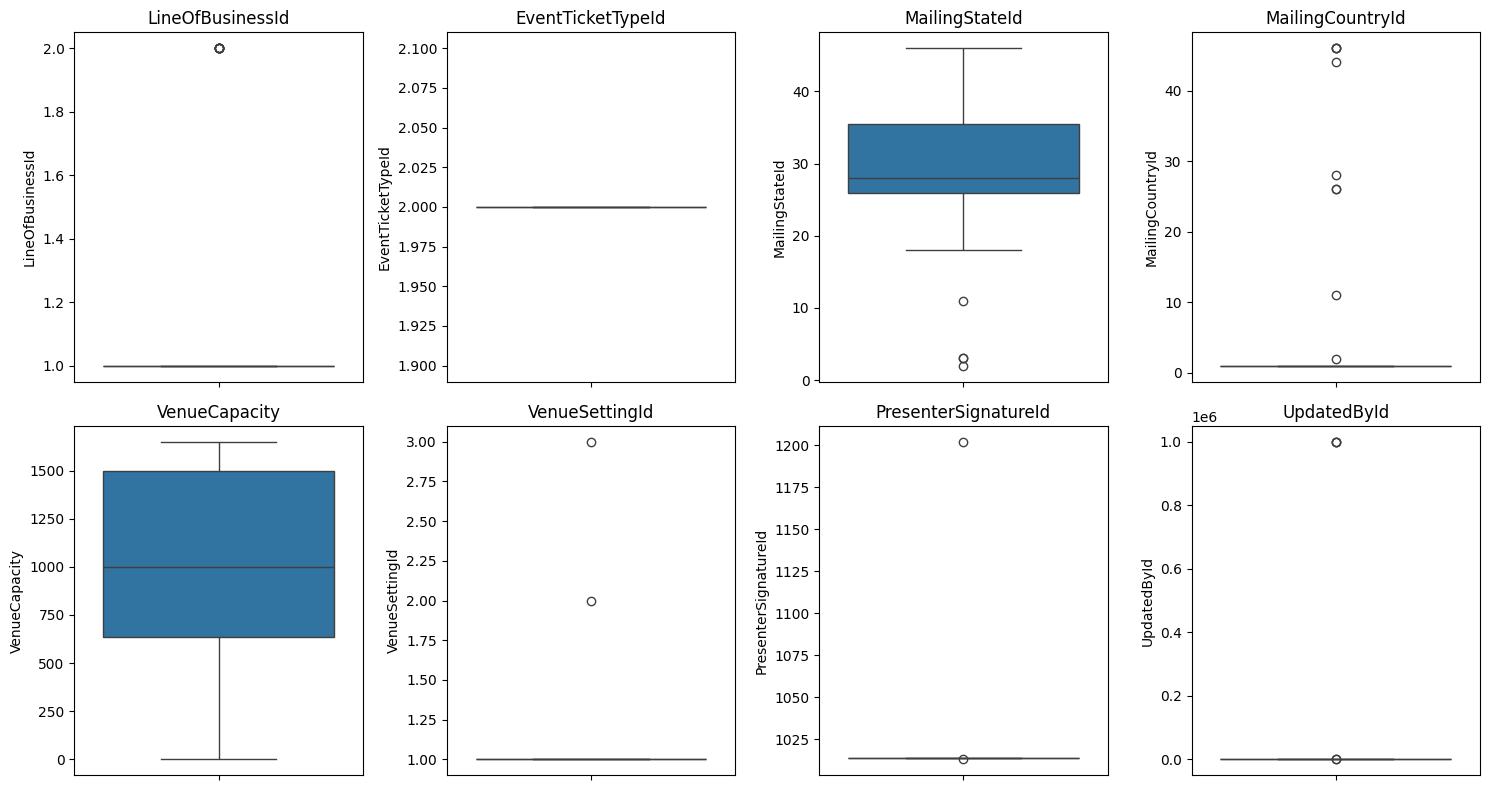

In [27]:
#Visualizing the outliers
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))

for i, col in enumerate(data_cols, 1):
    plt.subplot(2, (len(data_cols)+1)//2, i)
    sns.boxplot(y=df[col])
    plt.title(col)
    plt.tight_layout()

plt.show()

## Correlation Analysis

In [28]:
df[['EventTicketTypeId','VenuePhysicalCountryId']].nunique()

EventTicketTypeId         1
VenuePhysicalCountryId    1
dtype: int64

In [29]:
#Drop columns with constant values 
nunique = df.nunique()
cols_to_drop = nunique[nunique == 1].index # correlation cant be done if some cols have numerical variances or missing values
df = df.drop(columns=cols_to_drop)

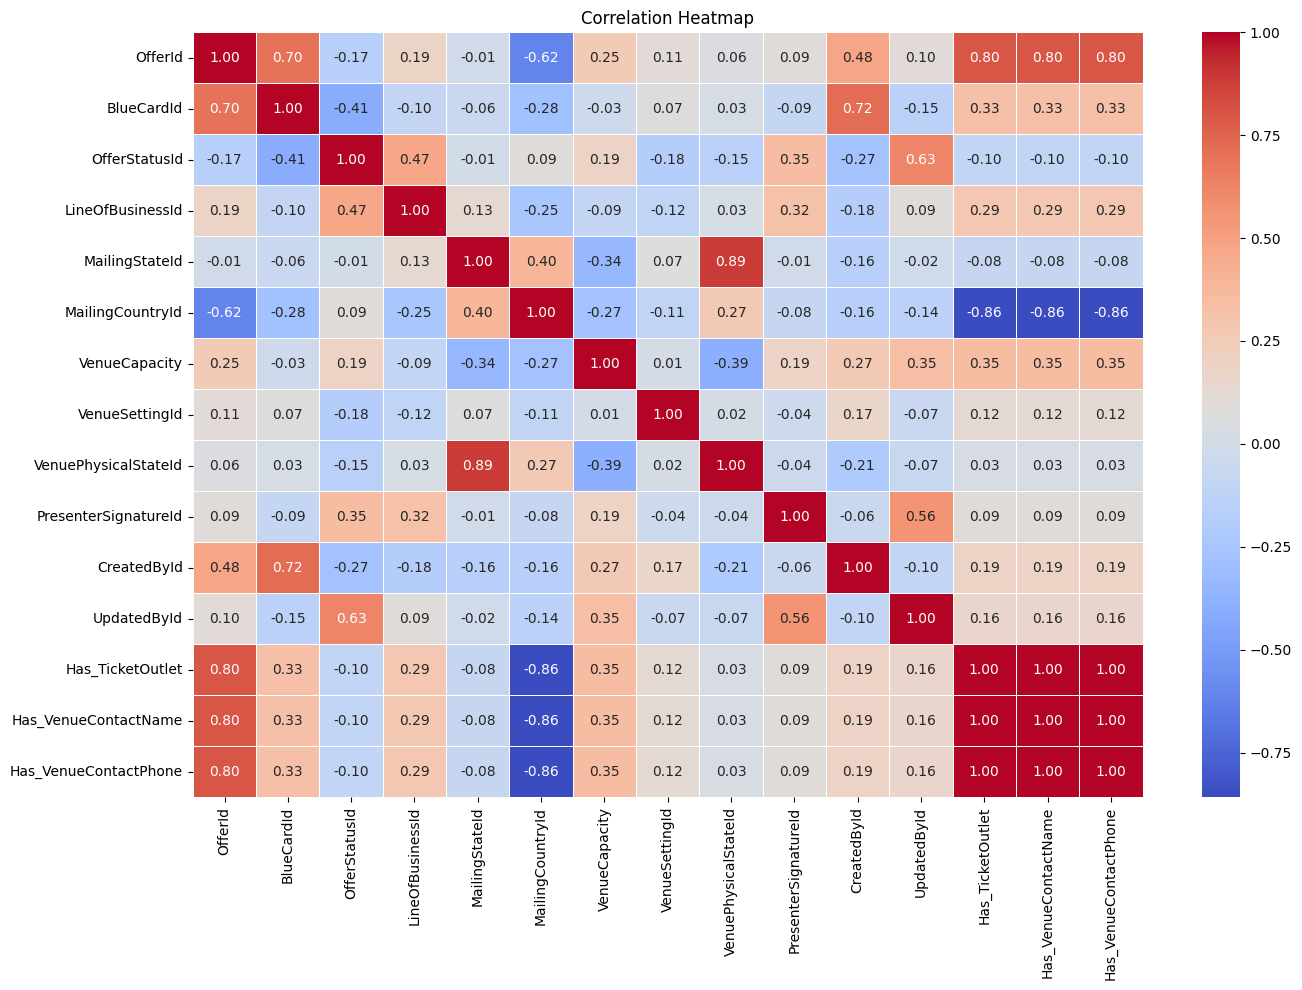

In [30]:
# Compute correlation matrix for numeric columns
corr_matrix = df.select_dtypes(include=['float64', 'int64']).corr()

# Set up the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

In [31]:
df.shape

(38, 34)

In [32]:
df.head()

,OfferId,BlueCardId,OfferStatusId,IsInProgress,LineOfBusinessId,IsPrivateOffer,IsTicketedEvent,PresenterName,MailingAddress1,MailingCity,MailingStateId,MailingZip,MailingCountryId,BuyerName,BuyerTitle,BuyerPhone,SignerName,SignerPhone,VenueName,VenueCapacity,VenueSettingId,IsSettingCovered,VenuePhysicalAddress1,VenuePhysicalCity,VenuePhysicalStateId,VenuePhysicalZip,PresenterSignatureId,CreatedDate,CreatedById,UpdatedDate,UpdatedById,Has_TicketOutlet,Has_VenueContactName,Has_VenueContactPhone
0,34161,800003,2,False,1.0,True,False,EastCoast Entertainment,4501 Circle 75 Pkwy,Atlanta,2.0,99999,2.0,Hunter Lawley,Producer,205-368-1196,Hunter Lawley,205-368-1196,Phi Kappa Psi Fraternity,800.0,1.0,True,965 University Blvd,Tuscaloosa,2,35401,1014.0,2018-06-02 04:07:29.963,0,2025-06-20 21:13:02.442042,277.0,0,0,0
1,34164,800004,2,False,1.0,True,False,EastCoast Entertainment,4501 Circle 75 Pkwy,Atlanta,26.0,30339,26.0,Hunter Lawley,Producer,205-368 1196,Hunter Lawley,205-368 1196,Kappa Alpha Fraternity,600.0,1.0,True,Fraternity Row,Starkville,26,99999,1014.0,2018-06-02 04:07:29.963,0,2025-06-20 21:13:02.442042,277.0,0,0,0
2,34165,800005,2,False,1.0,True,False,EastCoast Entertainment,4501 Circle 75 Pkwy,Atlanta,44.0,30339,44.0,Hunter Lawley,Producer,770-541 3027,Hunter Lawley,770-541 3027,Phi Gamma Delta Fraternity,600.0,1.0,True,300 W. 37th Street,Austin,44,99999,1014.0,2018-06-02 04:07:29.963,0,2025-06-20 21:13:02.442042,277.0,0,0,0
3,34166,800006,2,False,1.0,True,False,EastCoast Entertainment,915 Main St. Ste D,Montevallo,26.0,35115,26.0,Hunter Lawley,Producer,205-368-1196,Hunter Lawley,205-368-1196,Sigma Nu Fraternity,800.0,1.0,True,410 Poole Drive,Oxford,26,38655,1014.0,2018-06-02 04:07:29.963,0,2025-06-20 21:13:02.442042,277.0,0,0,0
4,34171,800007,2,False,1.0,True,False,EastCoast Entertainment,2400 Lake Park Dr SE,Smyrna,11.0,30080,11.0,Mark Letalien,Producer,678-713-8300,Mark Letalien,678-713-8300,Tau Epsilon Phi,500.0,1.0,True,125 Greek Park Circle,Athens,11,30605,1014.0,2018-06-02 04:07:29.963,0,2025-06-20 21:13:02.442042,277.0,0,0,0


In [33]:
#Dropping columns which we cannot make any observations
df_clean = df.drop(columns=['OfferId',
                'BuyerPhone',
                'BuyerName',
                'BlueCardId',
                'BuyerTitle',
                'SignerPhone',
                'MailingAddress1',
                'MailingCity',
                'MailingZip',
                'MailingStateId',
                'VenuePhysicalAddress1',
                'VenuePhysicalCity',
                'VenuePhysicalZip',
                'CreatedDate',
                'UpdatedDate',
                'PresenterSignatureId'],axis=1)


In [34]:
df_clean.head()

,OfferStatusId,IsInProgress,LineOfBusinessId,IsPrivateOffer,IsTicketedEvent,PresenterName,MailingCountryId,VenueName,VenueCapacity,VenueSettingId,IsSettingCovered,VenuePhysicalStateId,CreatedById,UpdatedById,Has_TicketOutlet,Has_VenueContactName,Has_VenueContactPhone
0,2,False,1.0,True,False,EastCoast Entertainment,2.0,Phi Kappa Psi Fraternity,800.0,1.0,True,2,0,277.0,0,0,0
1,2,False,1.0,True,False,EastCoast Entertainment,26.0,Kappa Alpha Fraternity,600.0,1.0,True,26,0,277.0,0,0,0
2,2,False,1.0,True,False,EastCoast Entertainment,44.0,Phi Gamma Delta Fraternity,600.0,1.0,True,44,0,277.0,0,0,0
3,2,False,1.0,True,False,EastCoast Entertainment,26.0,Sigma Nu Fraternity,800.0,1.0,True,26,0,277.0,0,0,0
4,2,False,1.0,True,False,EastCoast Entertainment,11.0,Tau Epsilon Phi,500.0,1.0,True,11,0,277.0,0,0,0


## DATA VISUALIZATION

**1D Visualization**

/tmp/ipykernel_2973/2420195453.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_ticket['IsTicketedEvent'].map({True: 1, False: 0}),


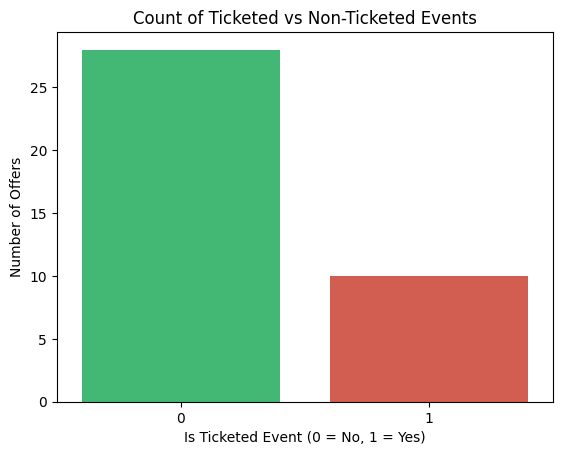

In [35]:
# Plotting the count of Ticketed vs Non-Ticketed events
df_ticket = df_clean
sns.countplot(x=df_ticket['IsTicketedEvent'].map({True: 1, False: 0}),
              palette=['#2ecc71', '#e74c3c'])  # Green for 0, Red for 1
plt.title('Count of Ticketed vs Non-Ticketed Events')
plt.xlabel('Is Ticketed Event (0 = No, 1 = Yes)')
plt.ylabel('Number of Offers')
plt.show()

'0' indicates most of the event are non tickets  and rest '1' are ticket events

/tmp/ipykernel_2973/3934157724.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df_progress['IsInProgress'].map({True: 1, False: 0}),


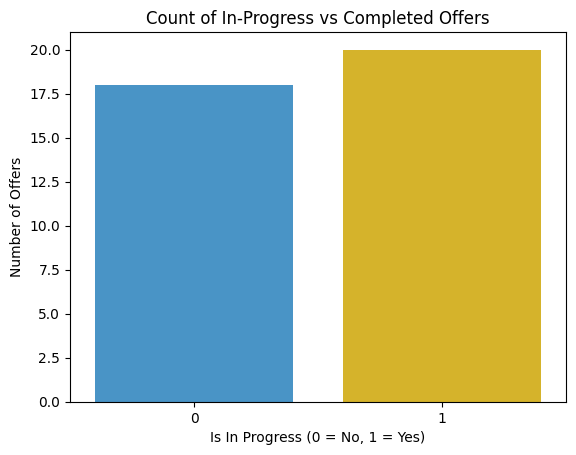

In [36]:
# Plot for IsInProgress column
df_progress = df_clean
sns.countplot(x=df_progress['IsInProgress'].map({True: 1, False: 0}), 
             palette=['#3498db', '#f1c40f'])  # Blue for 0, Yellow for 1
plt.title('Count of In-Progress vs Completed Offers')
plt.xlabel('Is In Progress (0 = No, 1 = Yes)')
plt.ylabel('Number of Offers')
plt.show()

Most offers are currently in progress which means that there are high volume of active campaigns, sales events, or promotional offers being managed at the moment.

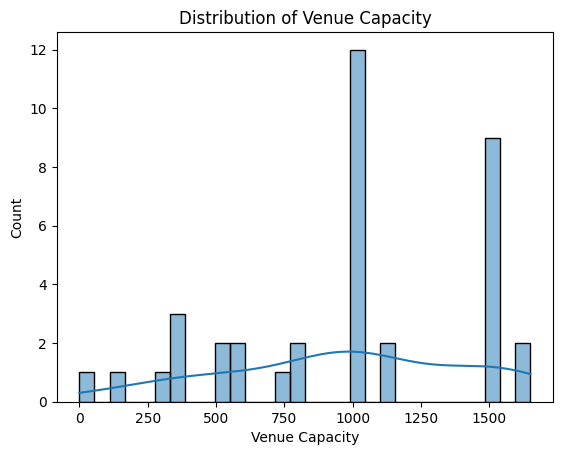

In [37]:
# Venue capacity distribution
sns.histplot(df_clean['VenueCapacity'].dropna(), bins=30, kde=True)
plt.title('Distribution of Venue Capacity')
plt.xlabel('Venue Capacity')
plt.show()

**2D Visualization**

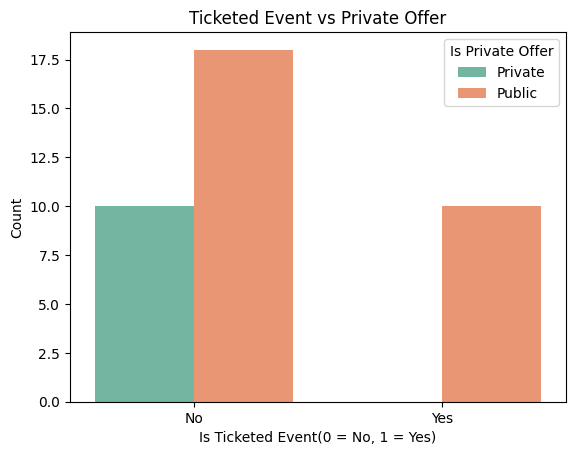

In [38]:
df_ticketEvent = df_clean.copy()

df_ticketEvent['IsTicketedEvent'] = df_ticketEvent['IsTicketedEvent'].map({False: 'No', True: 'Yes'})
df_ticketEvent['IsPrivateOffer'] = df_ticketEvent['IsPrivateOffer'].map({False: 'Public', True: 'Private'})

sns.countplot(x='IsTicketedEvent', hue='IsPrivateOffer', data=df_ticketEvent, palette='Set2')
plt.title('Ticketed Event vs Private Offer')
plt.xlabel('Is Ticketed Event(0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend(title='Is Private Offer')
plt.show()

* For yes under is the ticketed event which is public and none of them are private
* For non ticketed event both public and private offers exist

/tmp/ipykernel_2944/1726538704.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_venues.index, x=top_venues.values, palette='coolwarm')


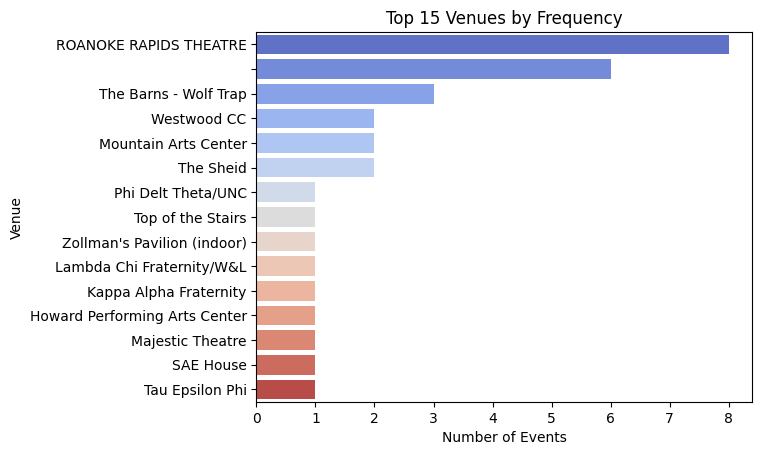

In [287]:
top_venues = df_clean['VenueName'].value_counts().nlargest(15) 

sns.barplot(y=top_venues.index, x=top_venues.values, palette='coolwarm')
plt.title('Top 15 Venues by Frequency')
plt.xlabel('Number of Events')
plt.ylabel('Venue')
plt.show()

**Performing Encoding for Categorical Variables**

In [78]:
#Columns to encode
binary_columns = ['IsInProgress', 'IsPrivateOffer', 'IsTicketedEvent', 'IsSettingCovered']

# Convert True/False or int values to 0/1
for col in binary_columns:
    df_clean[col] = df_clean[col].astype(int)

Dropping out categorical variables Venue name and Presenter name as it is a high cardinality so wont be possible to perform encoding

In [79]:
df_clean = df_clean.drop(columns=['PresenterName','VenueName'],axis=1)

In [80]:
df_clean.head()

,OfferStatusId,IsInProgress,LineOfBusinessId,IsPrivateOffer,IsTicketedEvent,MailingCountryId,VenueCapacity,VenueSettingId,IsSettingCovered,VenuePhysicalStateId,CreatedById,UpdatedById,Has_TicketOutlet,Has_VenueContactName,Has_VenueContactPhone
0,2,0,1.0,1,0,2.0,800.0,1.0,1,2,0,277.0,0,0,0
1,2,0,1.0,1,0,26.0,600.0,1.0,1,26,0,277.0,0,0,0
2,2,0,1.0,1,0,44.0,600.0,1.0,1,44,0,277.0,0,0,0
3,2,0,1.0,1,0,26.0,800.0,1.0,1,26,0,277.0,0,0,0
4,2,0,1.0,1,0,11.0,500.0,1.0,1,11,0,277.0,0,0,0


1)perform encoding for presenterName and venueName

2)Perform Normalization